# 1. Imports

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 2. Data importing

In [3]:
data = pd.read_csv('../../raw_data/data.csv')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,club_name_x,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0,0,Paris Saint-Germain,angel di maria,27.0,Right Winger,Man Utd,£56.70m,in,Summer,...,75+2,73+2,73+2,73+2,75+2,70+2,64+2,64+2,64+2,70+2
1,1,1,Olympique Lyon,sergi darder,21.0,Central Midfield,Málaga CF,£11.79m,in,Summer,...,68+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,66+0,66+0
2,2,2,RCD Espanyol Barcelona,sergi darder,23.0,Central Midfield,Olympique Lyon,Loan fee:£270Th.,in,Summer,...,71+1,75+1,75+1,75+1,71+1,69+1,69+1,69+1,69+1,69+1
3,3,3,RCD Espanyol Barcelona,sergi darder,24.0,Central Midfield,Olympique Lyon,£7.20m,in,Summer,...,69+1,73+1,73+1,73+1,69+1,67+1,66+1,66+1,66+1,67+1
4,4,4,AS Monaco,ivan cavaleiro,21.0,Left Winger,Benfica,£13.50m,in,Summer,...,57+0,55+0,55+0,55+0,57+0,53+0,48+0,48+0,48+0,53+0


In [5]:
data.shape

(5098, 120)

In [6]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [106]:
data[['club_name_x','player_name','club_involved_name','league_name_x','fifa year','club_name_y','league_name_y', 'dob']].head()

,club_name_x,player_name,club_involved_name,league_name_x,fifa year,club_name_y,league_name_y,dob
0,Paris Saint-Germain,angel di maria,Man Utd,Ligue 1,2015,Manchester United,English Premier League,1988-02-14
1,Olympique Lyon,sergi darder,Málaga CF,Ligue 1,2015,Málaga CF,Spain Primera Division,1993-12-22
2,RCD Espanyol Barcelona,sergi darder,Olympique Lyon,Primera Division,2017,Olympique Lyonnais,French Ligue 1,1993-12-22
3,RCD Espanyol Barcelona,sergi darder,Olympique Lyon,Primera Division,2018,RCD Espanyol,Spain Primera Division,1993-12-22
4,AS Monaco,ivan cavaleiro,Benfica,Ligue 1,2015,Deportivo de La Coruña,Spain Primera Division,1993-10-18


In [8]:
list(data.columns)

['club_name_x',
 'player_name',
 'age_x',
 'position',
 'club_involved_name',
 'fee',
 'transfer_movement',
 'transfer_period',
 'fee_cleaned',
 'league_name_x',
 'year',
 'season',
 'fifa year',
 'sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name_y',
 'league_name_y',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking

# 3. Exploratory Data Analysis

<AxesSubplot:>

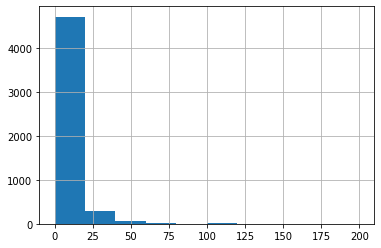

In [9]:
data['fee_cleaned'].hist()

<AxesSubplot:>

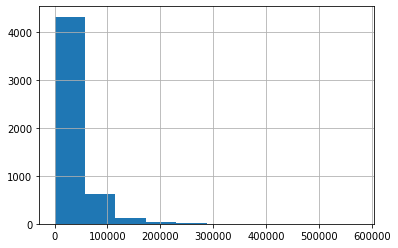

In [10]:
data['wage_eur'].hist()

## 3.1. Who are the top 10 best paid players who have been transfered in the last 6 years?

In [11]:
top10_wage_index = data['wage_eur'].sort_values(ascending=False).head(10).index

In [13]:
top10_wage_index

Int64Index([967, 3456, 641, 3876, 872, 4763, 1304, 4335, 3469, 3470], dtype='int64')

In [12]:
data.iloc[95][['club_name_x','player_name','age_x','position','club_involved_name','fee','transfer_movement',
               'transfer_period','fee_cleaned','league_name_x','year','season','fifa year','sofifa_id','player_url',
               'short_name','long_name','dob','height_cm','weight_kg','nationality','club_name_y','league_name_y',
               'league_rank','overall','potential','value_eur','wage_eur','player_positions','preferred_foot','international_reputation']]

club_name_x                                                     PSV Eindhoven
player_name                                                     hector moreno
age_x                                                                    27.0
position                                                          Centre-Back
club_involved_name                                                   Espanyol
fee                                                                    £3.15m
transfer_movement                                                          in
transfer_period                                                        Summer
fee_cleaned                                                              3.15
league_name_x                                                      Eredivisie
year                                                                     2015
season                                                              2015/2016
fifa year                                                       

In [33]:
data.iloc[94][['club_name_x','player_name','age_x','position','club_involved_name','fee','transfer_movement',
               'transfer_period','fee_cleaned','league_name_x','year','season','fifa year','sofifa_id','player_url',
               'short_name','long_name','dob','height_cm','weight_kg','nationality','club_name_y','league_name_y',
               'league_rank','overall','potential','value_eur','wage_eur','player_positions','preferred_foot','international_reputation']]

club_name_x                                            RCD Espanyol Barcelona
player_name                                                             naldo
age_x                                                                    28.0
position                                                          Centre-Back
club_involved_name                                                  Krasnodar
fee                                                                    £2.25m
transfer_movement                                                          in
transfer_period                                                        Summer
fee_cleaned                                                              2.25
league_name_x                                                Primera Division
year                                                                     2017
season                                                              2017/2018
fifa year                                                       

In [14]:
for idx, val in enumerate(top10_wage_index):
    print(f"#{idx} Player name:{data.iloc[val]['player_name']} @ index {val}")

#0 Player name:cristiano ronaldo @ index 967
#1 Player name:cristiano ronaldo @ index 3456
#2 Player name:neymar @ index 641
#3 Player name:philippe coutinho @ index 3876
#4 Player name:philippe coutinho @ index 872
#5 Player name:luis suarez @ index 4763
#6 Player name:luis suarez @ index 1304
#7 Player name:eden hazard @ index 4335
#8 Player name:gonzalo higuain @ index 3469
#9 Player name:gonzalo higuain @ index 3470


In [105]:
data.iloc[3456].head(30)

club_name_x                                                 Juventus FC
player_name                                           cristiano ronaldo
age_x                                                              33.0
position                                                    Left Winger
club_involved_name                                          Real Madrid
fee                                                            £105.30m
transfer_movement                                                    in
transfer_period                                                  Summer
fee_cleaned                                                       105.3
league_name_x                                                   Serie A
year                                                               2018
season                                                        2018/2019
fifa year                                                          2018
sofifa_id                                                       

In [22]:
data.iloc[3456]

club_name_x                 Juventus FC
player_name           cristiano ronaldo
age_x                              33.0
position                    Left Winger
club_involved_name          Real Madrid
                            ...        
lb                                 61+4
lcb                                53+4
cb                                 53+4
rcb                                53+4
rb                                 61+4
Name: 3456, Length: 118, dtype: object

In [15]:
data.player_name.nunique()

2837

In [16]:
data.drop_duplicates().shape

(4091, 118)

In [17]:
data.shape

(5098, 118)

In [18]:
data2 = data.drop_duplicates()

In [32]:
top15_wage_no_duplicates = data2['wage_eur'].sort_values(ascending=False).head(15).index
top15_wage_no_duplicates

Int64Index([967, 641, 872, 1304, 4335, 467, 468, 1300, 0, 783, 2624, 968, 5041,
            2022, 896],
           dtype='int64')

In [34]:
for idx, val in enumerate(top15_wage_no_duplicates):
    print(f"#{idx} Player name:{data.iloc[val]['player_name']} @ index {val}")

#0 Player name:cristiano ronaldo @ index 967
#1 Player name:neymar @ index 641
#2 Player name:philippe coutinho @ index 872
#3 Player name:luis suarez @ index 1304
#4 Player name:eden hazard @ index 4335
#5 Player name:gonzalo higuain @ index 467
#6 Player name:gonzalo higuain @ index 468
#7 Player name:ivan rakitic @ index 1300
#8 Player name:angel di maria @ index 0
#9 Player name:romelu lukaku @ index 783
#10 Player name:james rodriguez @ index 2624
#11 Player name:cristiano ronaldo @ index 968
#12 Player name:raphael varane @ index 5041
#13 Player name:mats hummels @ index 2022
#14 Player name:cesc fabregas @ index 896


In [31]:
data.iloc[467].head(20)

club_name_x                                                    AC Milan
player_name                                             gonzalo higuain
age_x                                                              30.0
position                                                 Centre-Forward
club_involved_name                                             Juventus
fee                                                     Loan fee:£9.18m
transfer_movement                                                    in
transfer_period                                                  Summer
fee_cleaned                                                        9.18
league_name_x                                                   Serie A
year                                                               2018
season                                                        2018/2019
fifa year                                                          2018
sofifa_id                                                       

In [30]:
data.iloc[468].head(20)

club_name_x                                                  Chelsea FC
player_name                                             gonzalo higuain
age_x                                                              31.0
position                                                 Centre-Forward
club_involved_name                                             Juventus
fee                                                     Loan fee:£7.02m
transfer_movement                                                    in
transfer_period                                                  Winter
fee_cleaned                                                        7.02
league_name_x                                            Premier League
year                                                               2018
season                                                        2018/2019
fifa year                                                          2018
sofifa_id                                                       

In [39]:
data[data.player_name == 'lionel messi']

,club_name_x,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name_x,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [40]:
transfer_byname = pd.read_csv('../../raw_data/transfer_features_by_name.csv')

In [46]:
transfer_byname[transfer_byname.player_name.str.contains('messi')]

,Unnamed: 0,club_name_x,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name
3526,3526,AC Milan,junior messias,30.0,Attacking Midfield,Crotone,Loan fee:£2.34m,in,Summer,2.34,...,42+2,42+2,45+2,41+2,33+2,33+2,33+2,41+2,Messias,Junior


## 3.2. Player Transfer value over its overall ability

<AxesSubplot:xlabel='overall', ylabel='fee_cleaned'>

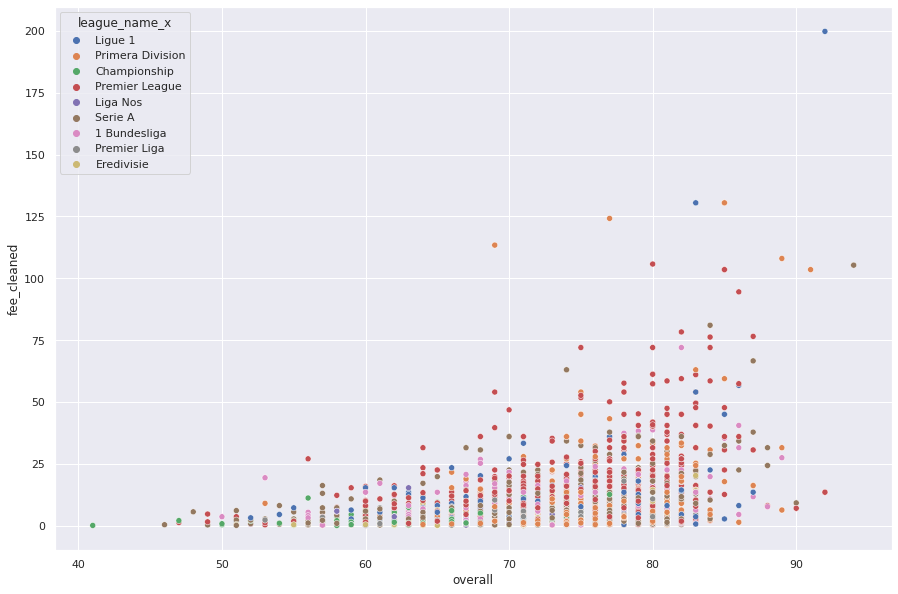

In [86]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15, 10)}) #width=3, #height=4
sns.scatterplot(data=data, x='overall', y='fee_cleaned', palette="deep", hue='league_name_x')

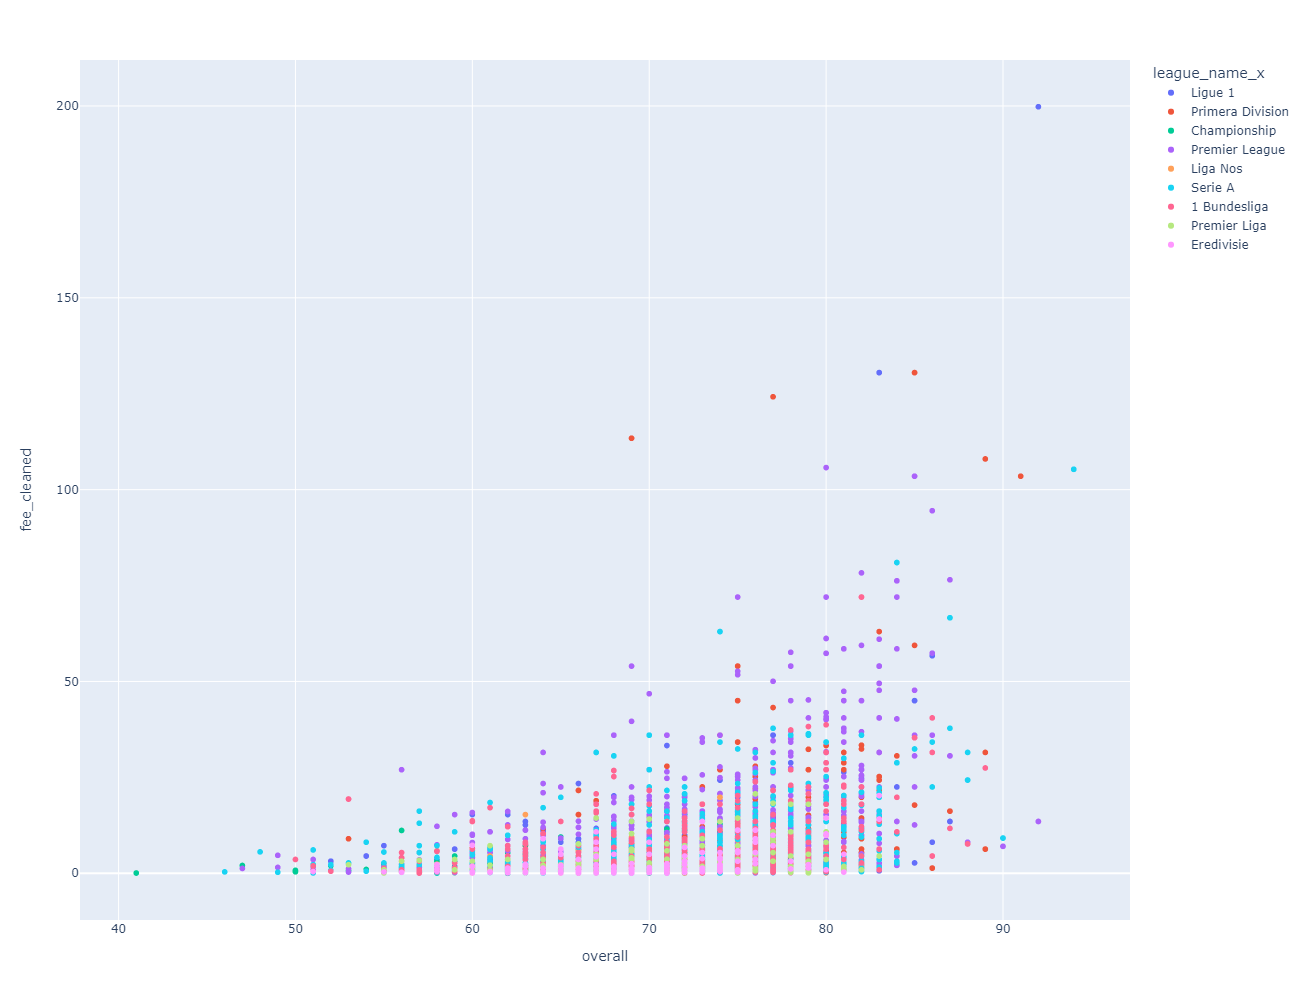

In [134]:
fig = px.scatter(data, x="overall", y="fee_cleaned",color='league_name_x', hover_data=['player_name', 'league_name_x', 'fifa year', 'age_x'], width=1000, height=1000)
fig.show()

1. A player's overall ability doesnt seem to carry much influence over the transfer fee.

2. Some examples of "cheap" but "good overall" players include:
    * ivan rakitic
    * steve mandanda (goalkeeper)
    * daniel sturridge
    * pau lopez (goalkeeper)
    
3. Altough **young players** seem to have **higher transfer fees**, this could lead to an early affiramtion that player's transfer fee is somewhat dictated by their **potential**. Look at cases such as:
    * Joao Felix (19 years old, 2019)
    * Dembele
    * jack grealish
    * neymar (in 2017, sold for a whooping £199.8m)
    * paul pogba (2016)
    * victor osimhen

## 3.3. Number of incoming players by league

<AxesSubplot:xlabel='league_name_x', ylabel='Count'>

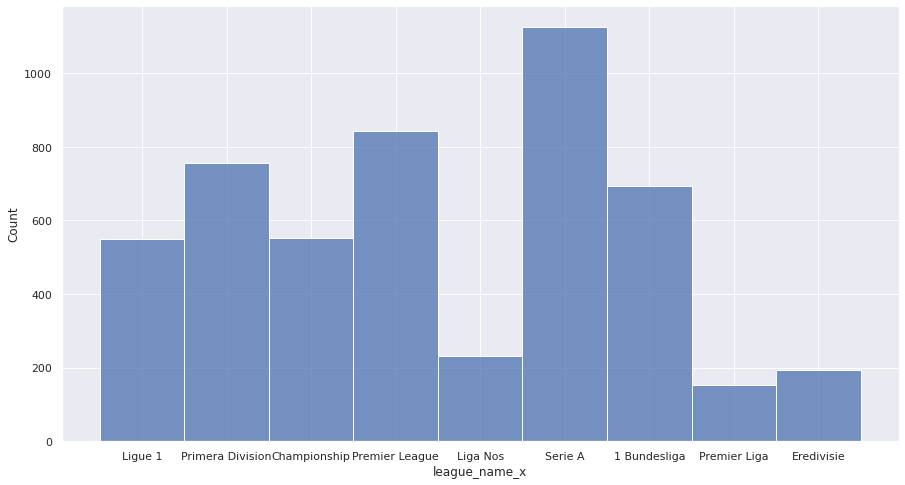

In [71]:
sns.set(rc={"figure.figsize":(15, 8)}) #width=3, #height=4
sns.histplot(data, x='league_name_x')

## 3.4. Leagues where players come from

In [80]:
data.league_name_y.unique()

array(['English Premier League', 'Spain Primera Division',
       'French Ligue 1', 'Argentina Primera División',
       'Austrian Football Bundesliga', 'French Ligue 2',
       'German 2. Bundesliga', 'Portuguese Liga ZON SAGRES',
       'Holland Eredivisie', 'Turkish Süper Lig', 'Norwegian Eliteserien',
       'Italian Serie A', 'German 1. Bundesliga',
       'Colombian Liga Postobón', 'Swiss Super League', nan,
       'Polish T-Mobile Ekstraklasa', 'Danish Superliga',
       'Russian Premier League', 'Mexican Liga MX', 'English League Two',
       'English League Championship', 'Spanish Segunda División',
       'Italian Serie B', 'Greek Super League',
       'Belgian Jupiler Pro League', 'Swedish Allsvenskan',
       'Chilian Campeonato Nacional', 'Australian Hyundai A-League',
       'Chinese Super League', 'German 3. Bundesliga',
       'Scottish Premiership', 'Japanese J. League Division 1',
       'English League One', 'Czech Republic Gambrinus Liga',
       'Rep. Ireland Airtr

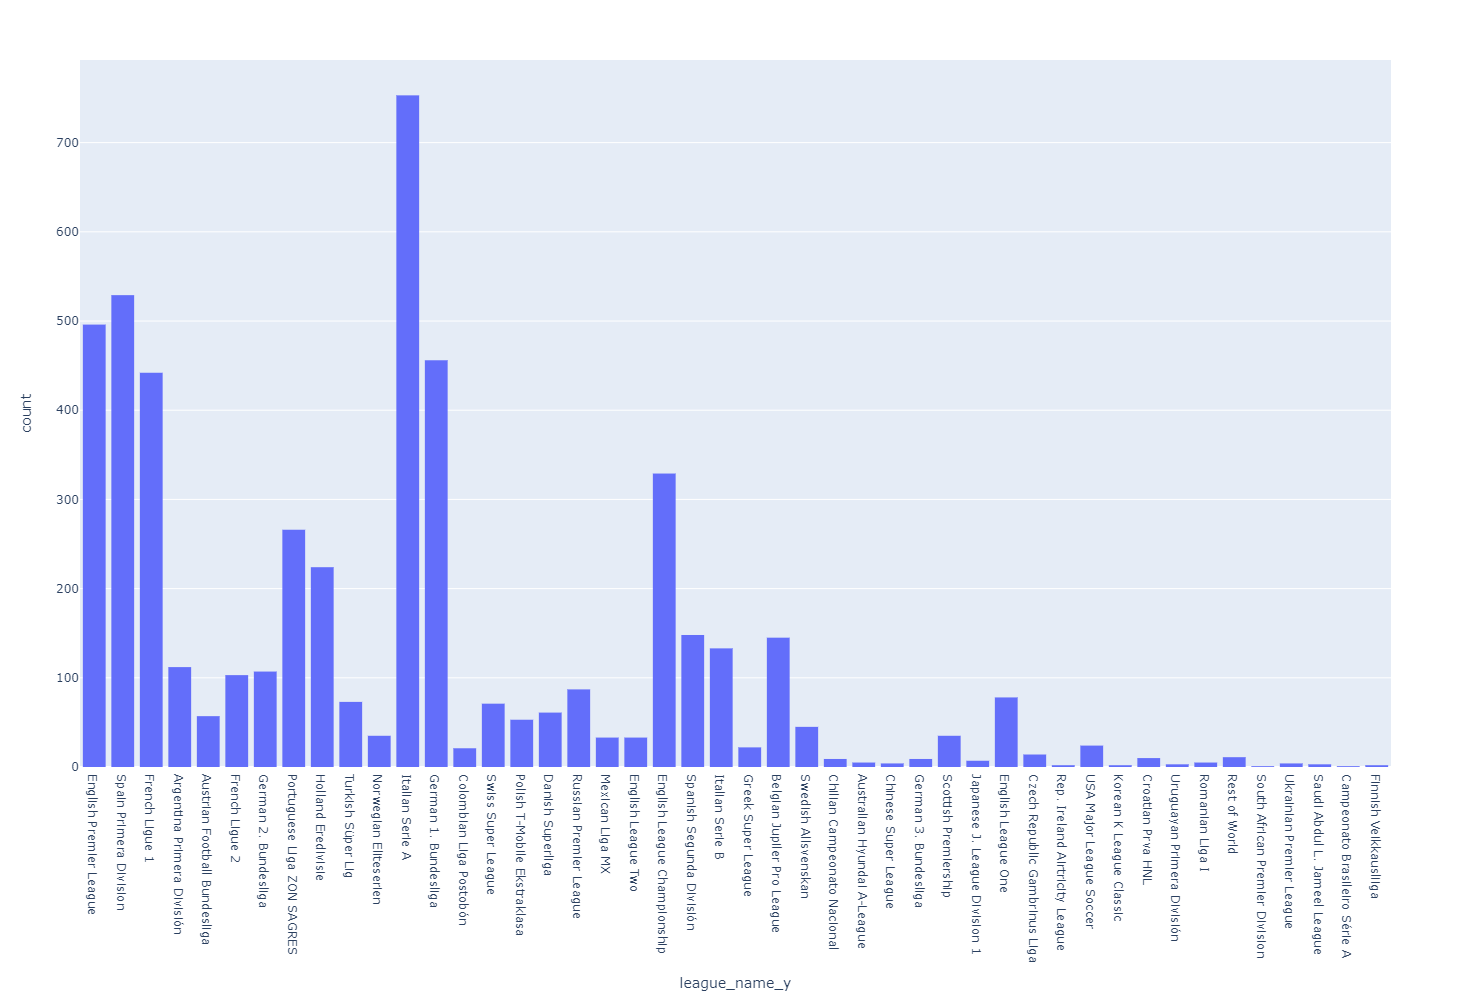

In [82]:
fig = px.histogram(data, x="league_name_y", width=1000, height=1000)
fig.show()

## 3.5. Transfer fee distribution per buying league

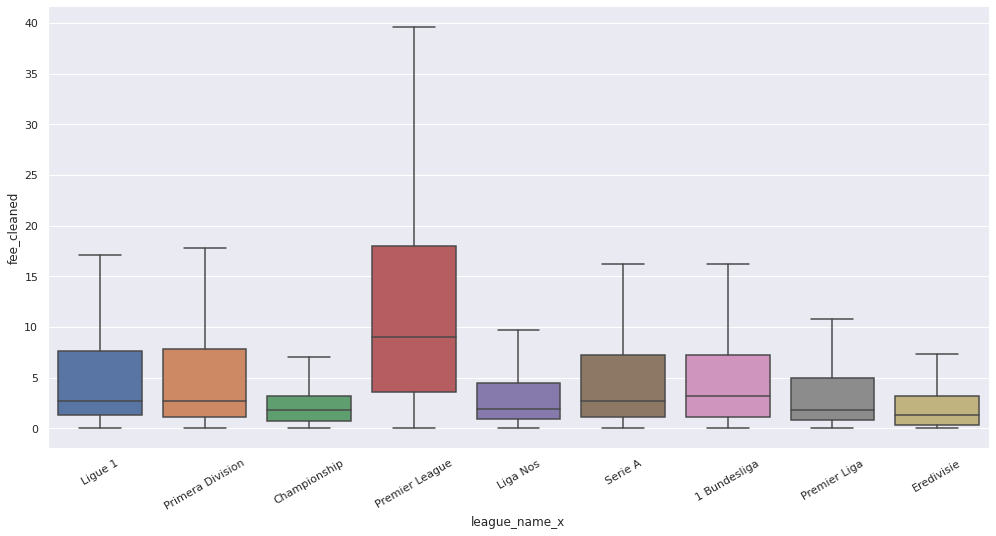

In [120]:
ax = sns.catplot(data=data, x='league_name_x',y='fee_cleaned', kind='box', showfliers=False, height=7,aspect=2)
ax.set_xticklabels(rotation = 30)

## 3.6. Distribution per player position

### 3.6.1. transfer fee distribution per player position

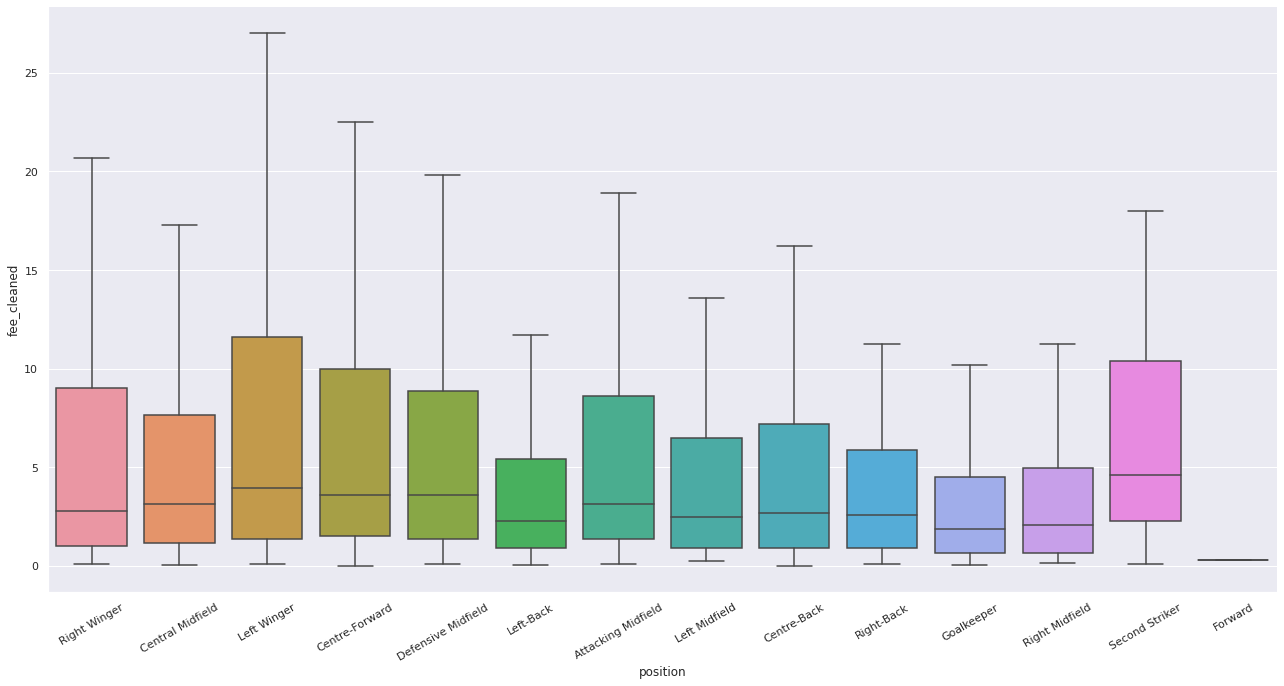

In [118]:
ax = sns.catplot(data=data, x='position',y='fee_cleaned', kind='box', showfliers=False, height=9,aspect=2)
ax.set_xticklabels(rotation = 30)

 * a second striker seems to have a higher median

### 3.6.1. wage distribution per player position

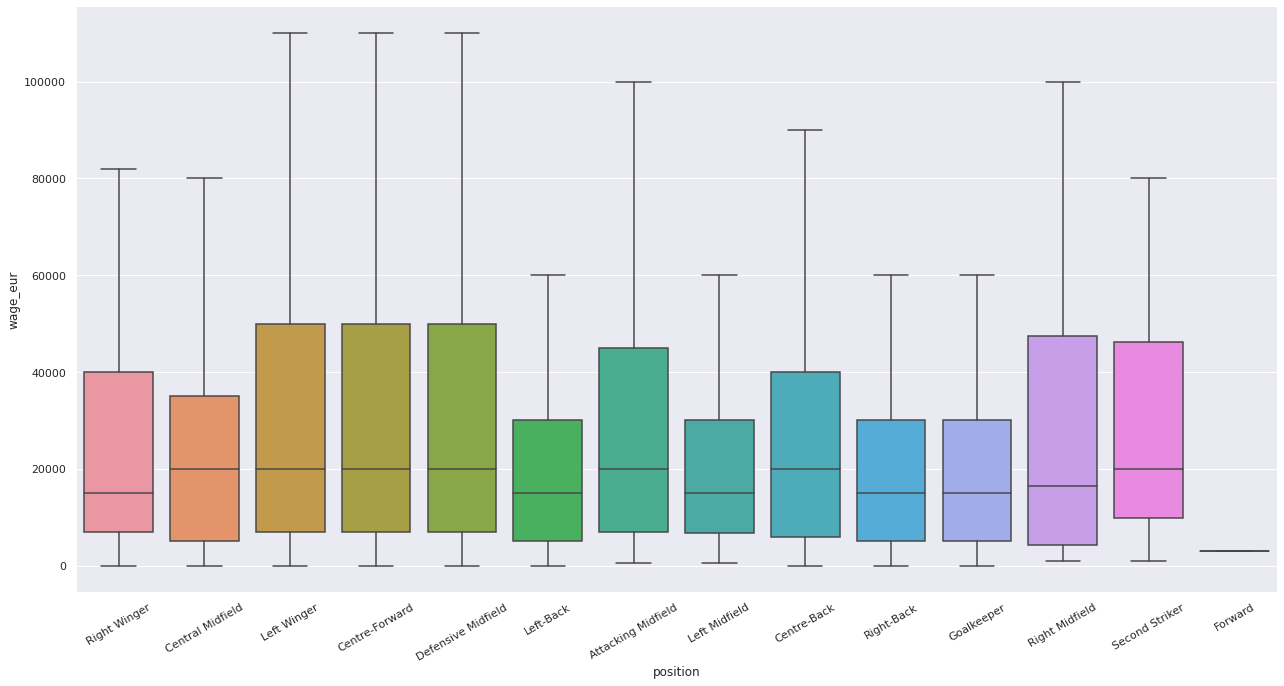

In [121]:
ax = sns.catplot(data=data, x='position',y='wage_eur', kind='box', showfliers=False, height=9,aspect=2)
ax.set_xticklabels(rotation = 30)

## 3.7. Player age Vs. transfer fee

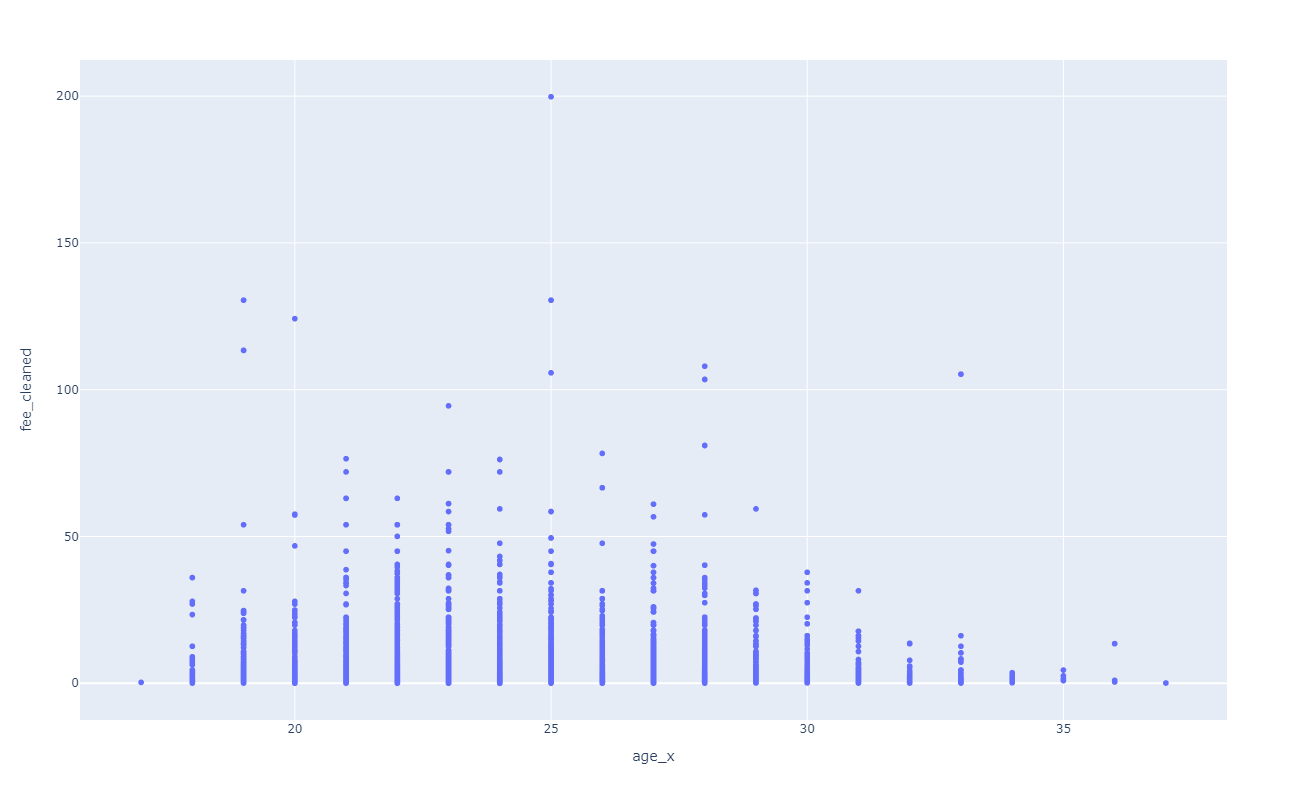

In [124]:
fig = px.scatter(data, x="age_x", y="fee_cleaned", hover_data=['player_name', 'league_name_x', 'fifa year'], width=1000, height=800)
fig.show()

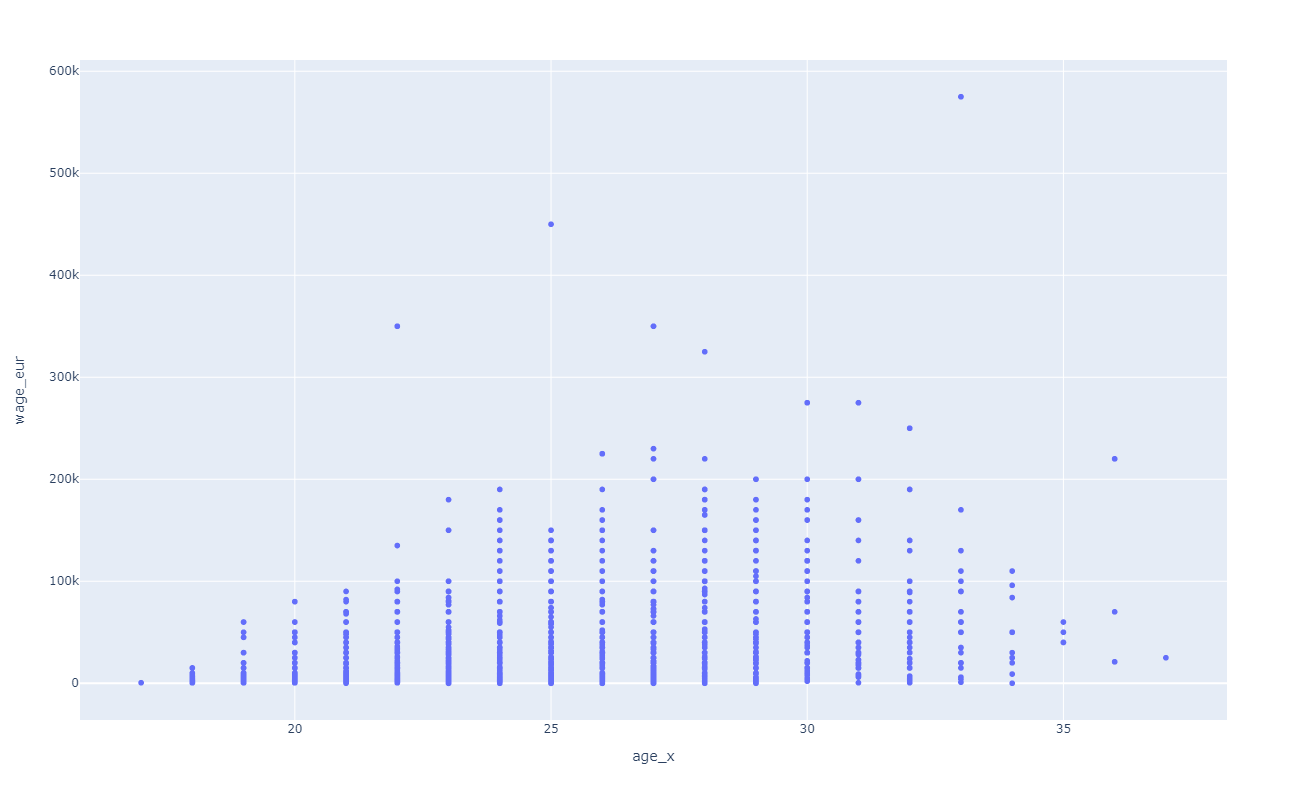

In [129]:
fig = px.scatter(data, x="age_x", y="wage_eur", hover_data=['player_name', 'league_name_x', 'fifa year'], width=1000, height=800)
fig.show()

## 3.8 Player age distribution

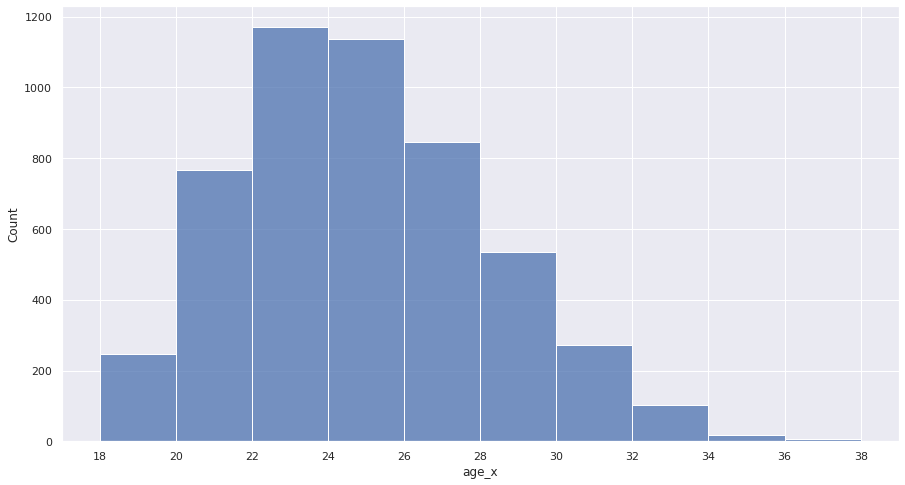

In [131]:
ax = sns.histplot(data, x='age_x', bins=[18,20,22,24,26,28,30,32,34,36,38])
ax.set_xticks([18,20,22,24,26,28,30,32,34,36,38]);

## 3.9. Checking feature importance on the fee_transfer

In [133]:
data_to_explore = ['year','season','fifa year','sofifa_id','player_url','short_name','long_name','dob','height_cm','weight_kg']